# I - Préparation Nettoyage et Analyse Exploratoire

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns


## 1. Choix des données

In [2]:
 df_disponibilite = pd.read_csv(r'C:\Users\orlya\Desktop\Projet 9\DisponibiliteAlimentaire_2017.csv')

In [3]:

df_disponibilite

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.00,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.00,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.00,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.00,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.00,S,Données standardisées
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176595,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,5142,Nourriture,2899,Miscellanees,2017,2017,Milliers de tonnes,19.00,S,Données standardisées
176596,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,645,Disponibilité alimentaire en quantité (kg/pers...,2899,Miscellanees,2017,2017,kg,1.33,Fc,Donnée calculée
176597,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,664,Disponibilité alimentaire (Kcal/personne/jour),2899,Miscellanees,2017,2017,Kcal/personne/jour,1.00,Fc,Donnée calculée
176598,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,674,Disponibilité de protéines en quantité (g/pers...,2899,Miscellanees,2017,2017,g/personne/jour,0.04,Fc,Donnée calculée


df_disponibilite = df_disponibilite.drop(['Code Domaine', 'Code Élément', 'Code année', 'Symbole', 'Description du Symbole', 'Code Produit'], axis=1)

In [4]:
df_disponibilite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64

In [5]:
df_population = pd.read_csv(r'C:\Users\orlya\Desktop\Projet 9\Population_2000_2018.csv')

In [6]:
df_population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [7]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
 14  Note                    258 non-null    

In [8]:
df_macro = pd.read_csv(r'C:\Users\orlya\Desktop\Projet 9\macroeco.csv')


In [9]:
df_macro.head(10)

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,2,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,Millions d’USD,18896.352021,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,2,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,530.149831,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,2,Afghanistan,6129,Croissance annuelle US$,22008,Produit Intérieur Brut,2017,2017,%,4.865789,X,Ciffre de sources internationales,NaN
3,MK,Indicateurs macro,2,Afghanistan,61290,Croissance annuelle US$ par habitant,22008,Produit Intérieur Brut,2017,2017,%,1.902494,X,Ciffre de sources internationales,NaN
4,MK,Indicateurs macro,2,Afghanistan,6110,Valeur US $,22011,Revenu national brut,2017,2017,Millions d’USD,19145.017023,X,Ciffre de sources internationales,NaN
5,MK,Indicateurs macro,2,Afghanistan,6119,Valeur US $ par habitant,22011,Revenu national brut,2017,2017,US$,537.126294,X,Ciffre de sources internationales,NaN
6,MK,Indicateurs macro,2,Afghanistan,6129,Croissance annuelle US$,22011,Revenu national brut,2017,2017,%,5.197451,X,Ciffre de sources internationales,NaN
7,MK,Indicateurs macro,2,Afghanistan,61290,Croissance annuelle US$ par habitant,22011,Revenu national brut,2017,2017,%,2.224784,X,Ciffre de sources internationales,NaN
8,MK,Indicateurs macro,202,Afrique du Sud,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,Millions d’USD,380851.444101,X,Ciffre de sources internationales,NaN
9,MK,Indicateurs macro,202,Afrique du Sud,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,6723.928582,X,Ciffre de sources internationales,NaN


In [10]:
df_macro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1688 entries, 0 to 1687
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            1688 non-null   object 
 1   Domaine                 1688 non-null   object 
 2   Code zone (FAO)         1688 non-null   int64  
 3   Zone                    1688 non-null   object 
 4   Code Élément            1688 non-null   int64  
 5   Élément                 1688 non-null   object 
 6   Code Produit            1688 non-null   int64  
 7   Produit                 1688 non-null   object 
 8   Code année              1688 non-null   int64  
 9   Année                   1688 non-null   int64  
 10  Unité                   1688 non-null   object 
 11  Valeur                  1688 non-null   float64
 12  Symbole                 1688 non-null   object 
 13  Description du Symbole  1688 non-null   object 
 14  Note                    0 non-null      

In [11]:
df_securite = pd.read_csv(r'C:\Users\orlya\Desktop\Projet 9\securite.csv')

In [12]:
df_securite.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,150,Pays-Bas (Royaume des),6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.92,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,2,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-2.80,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-0.28,X,Ciffre de sources internationales,NaN
3,FS,Données de la sécurité alimentaire,3,Albanie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.38,X,Ciffre de sources internationales,NaN
4,FS,Données de la sécurité alimentaire,4,Algérie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-0.92,X,Ciffre de sources internationales,NaN


In [13]:
df_securite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            196 non-null    object 
 1   Domaine                 196 non-null    object 
 2   Code zone (FAO)         196 non-null    int64  
 3   Zone                    196 non-null    object 
 4   Code Élément            196 non-null    int64  
 5   Élément                 196 non-null    object 
 6   Code Produit            196 non-null    int64  
 7   Produit                 196 non-null    object 
 8   Code année              196 non-null    int64  
 9   Année                   196 non-null    int64  
 10  Unité                   196 non-null    object 
 11  Valeur                  196 non-null    float64
 12  Symbole                 196 non-null    object 
 13  Description du Symbole  196 non-null    object 
 14  Note                    0 non-null      fl

In [14]:
df_securite = df_securite.drop(['Note'], axis=1)

In [15]:
df_securite

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FS,Données de la sécurité alimentaire,150,Pays-Bas (Royaume des),6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.92,X,Ciffre de sources internationales
1,FS,Données de la sécurité alimentaire,2,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-2.80,X,Ciffre de sources internationales
2,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-0.28,X,Ciffre de sources internationales
3,FS,Données de la sécurité alimentaire,3,Albanie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.38,X,Ciffre de sources internationales
4,FS,Données de la sécurité alimentaire,4,Algérie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-0.92,X,Ciffre de sources internationales
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,FS,Données de la sécurité alimentaire,236,Venezuela (République bolivarienne du),6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-1.27,X,Ciffre de sources internationales
192,FS,Données de la sécurité alimentaire,237,Viet Nam,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.23,X,Ciffre de sources internationales
193,FS,Données de la sécurité alimentaire,249,Yémen,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-2.94,X,Ciffre de sources internationales
194,FS,Données de la sécurité alimentaire,251,Zambie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.15,X,Ciffre de sources internationales


In [16]:
# Crée la liste des DataFrames
dfs = ['df_disponibilite', 'df_macro', 'df_population', 'df_securite']

# Affiche la taille des DataFrames
print(f'Dimensions des DataFrames :')
for df in dfs:
    print(f'- {df} : {eval(df).shape}')


Dimensions des DataFrames :
- df_disponibilite : (176600, 14)
- df_macro : (1688, 15)
- df_population : (4411, 15)
- df_securite : (196, 14)


###### les noms des variables comprennent des majuscules, des espaces ou des accents. Pour simplifier la lecture et les manipulations, nous créons une fonction qui va convertir les variables selon la convention snake case.

In [17]:
def snake_case (df):
    """Renomme les variables d'un DataFrame selon la convention snake case."""
    df.columns = (
        df.columns
        .str.lower()
        .str.replace('\'', '_')
        .str.replace(' - ', '_')
        .str.replace('-', '_')
        .str.replace(' ', '_')
        .str.normalize('NFKD')
        .str.encode('ascii', errors='ignore')
        .str.decode('utf-8')
    )

#### On applique ensuite cette fonction à nos jeux de données.

In [18]:
# Applique la fonction 'snake_case' aux DataFrames
for df in dfs:
    snake_case(eval(df))



In [19]:
df_population

,code_domaine,domaine,code_zone,zone,code_element,element,code_produit,produit,code_annee,annee,unite,valeur,symbole,description_du_symbole,note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2014,2014,1000 personnes,13586.707,X,Sources internationales sûres,NaN
4407,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2015,2015,1000 personnes,13814.629,X,Sources internationales sûres,NaN
4408,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2016,2016,1000 personnes,14030.331,X,Sources internationales sûres,NaN
4409,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,14236.595,X,Sources internationales sûres,NaN


### 1.1- création de la dataframe finale

In [20]:
# Affiche le nombre de pays de chaque DataFrame
print(f'Nombre de pays par DataFrame :')
for df in dfs:
    n_pays = eval(df)['zone'].nunique()
    print(f'- {df} : {n_pays}')



Nombre de pays par DataFrame :
- df_disponibilite : 174
- df_macro : 211
- df_population : 238
- df_securite : 196


*C'est le DataFrame de la population qui contient le plus de pays.*

### 1.1 Création du dataframe final

In [21]:
# Crée le DataFrame final à partir de celui de la population
df_final = df_population.copy()

# Filtre 'annee' et ne conserve que les variables utiles
df_final = df_final.loc[
    df_final['annee'] == 2017, ['code_zone', 'zone', 'valeur']
].reset_index(drop=True)

# Renomme la variable 'valeur'
df_final = df_final.rename(
    columns={'valeur': 'population_milliers_hab'})

df_final.head()

,code_zone,zone,population_milliers_hab
0,2,Afghanistan,36296.113
1,202,Afrique du Sud,57009.756
2,3,Albanie,2884.169
3,4,Algérie,41389.189
4,79,Allemagne,82658.409


In [22]:
# Crée un DataFrame temporaire
df_temp = df_population.copy()

# Pivote 'code_zone' et 'zone'
df_temp = df_temp.pivot_table(
    index='annee', columns=['code_zone', 'zone'], values='valeur')

# Complète les valeurs des années manquantes par celles de la ligne précédente
df_temp = df_temp.fillna(method='bfill', axis='rows')

# Calcule l'écart en pourcentage entre deux lignes
df_temp = df_temp.pct_change()

# Calcule de l'évolution moyenne de chaque colonne
df_temp = (
    (df_temp.mean()*100).round(2)
    .to_frame(name='evolution_moyenne_population_pct')
    .reset_index()
)

# Ajoute la variable à 'df_final'
df_final = pd.merge(
    df_final,
    df_temp[['code_zone', 'evolution_moyenne_population_pct']],
    how='left',
    on='code_zone'
)

del df_temp

df_final.head(3)


C:\Users\orlya\AppData\Local\Temp\ipykernel_20564\2199374810.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_temp = df_temp.fillna(method='bfill', axis='rows')
C:\Users\orlya\AppData\Local\Temp\ipykernel_20564\2199374810.py:12: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_temp = df_temp.pct_change()


,code_zone,zone,population_milliers_hab,evolution_moyenne_population_pct
0,2,Afghanistan,36296.113,3.29
1,202,Afrique du Sud,57009.756,1.40
2,3,Albanie,2884.169,-0.45


In [23]:
df_disponibilite

,code_domaine,domaine,code_zone,zone,code_element,element,code_produit,produit,code_annee,annee,unite,valeur,symbole,description_du_symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.00,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.00,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.00,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.00,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.00,S,Données standardisées
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176595,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,5142,Nourriture,2899,Miscellanees,2017,2017,Milliers de tonnes,19.00,S,Données standardisées
176596,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,645,Disponibilité alimentaire en quantité (kg/pers...,2899,Miscellanees,2017,2017,kg,1.33,Fc,Donnée calculée
176597,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,664,Disponibilité alimentaire (Kcal/personne/jour),2899,Miscellanees,2017,2017,Kcal/personne/jour,1.00,Fc,Donnée calculée
176598,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,674,Disponibilité de protéines en quantité (g/pers...,2899,Miscellanees,2017,2017,g/personne/jour,0.04,Fc,Donnée calculée


**Part de la consommation de poulet dans l'alimentation.**

Nous souhaitons calculer la consommation de poulet dans l'alimentation, hors tous les produits sont présents dans nos données. Nous allons donc chercher le nom de produit qui correspond au poulet.



In [24]:
df_disponibilite.loc[(df_disponibilite['produit']
    .str.contains('poulet|volaille|dinde', case=False))]['produit'].unique()

array(['Viande de Volailles'], dtype=object)

In [25]:

# Crée un DataFrame temporaire en filtrant 'element'
df_temp = df_disponibilite.loc[df_disponibilite['element'] == 'Nourriture']

# Pivote 'produit'
df_temp = df_temp.pivot_table(
    index='code_zone', columns='produit', values='valeur'
).fillna(0)

# Calcul la part de consommation de volaille
df_temp['consommation_volaille_pct'] = (
    df_temp['Viande de Volailles'] / df_temp.sum(axis='columns') * 100
).round(2)

# Réinitialise l'index
df_temp = df_temp.reset_index().rename_axis(None, axis='columns')

# Ajoute la variable à 'df_final'
df_final = pd.merge(
    df_final,
    df_temp[['code_zone', 'consommation_volaille_pct']],
    how='left',
    on='code_zone'
)
# Supprime le DataFrame temporaire pour libérer de la mémoire
del df_temp

df_final.head(3)

,code_zone,zone,population_milliers_hab,evolution_moyenne_population_pct,consommation_volaille_pct
0,2,Afghanistan,36296.113,3.29,0.42
1,202,Afrique du Sud,57009.756,1.40,6.41
2,3,Albanie,2884.169,-0.45,1.29


**Ajout du taux de dépendance aux importations (TDI).
Ce dernier se calcul de la manière suivante :**

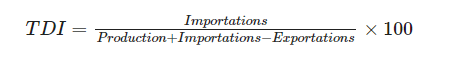



In [26]:
# Crée un DataFrame temporaire en filtrant 'produit'
df_temp = df_disponibilite.loc[
    df_disponibilite['produit'] == 'Viande de Volailles']

# Pivote 'element'
df_temp = (
    df_temp.pivot_table(index='code_zone', columns='element', values='valeur')
).reset_index().rename_axis(None, axis='columns').fillna(0)

# Calcul le taux de dépendance aux importations
df_temp['tdi_pct'] = (
    df_temp['Importations - Quantité']
    / (df_temp['Production']
       + df_temp['Importations - Quantité']
       - df_temp['Exportations - Quantité'])
       * 100
).round(2)

# Ajoute la variable à 'df_final'
df_final = pd.merge(
    df_final,
    df_temp[['code_zone', 'tdi_pct']],
    how='left',
    on='code_zone'
)

del df_temp

df_final.head(3)

,code_zone,zone,population_milliers_hab,evolution_moyenne_population_pct,consommation_volaille_pct,tdi_pct
0,2,Afghanistan,36296.113,3.29,0.42,50.88
1,202,Afrique du Sud,57009.756,1.40,6.41,24.27
2,3,Albanie,2884.169,-0.45,1.29,74.51


**Ajout de la disponibilité de viande de volailles**

In [27]:
# Crée un DataFrame temporaire en filtrant 'element et 'produit'
df_temp = df_disponibilite.loc[
    (df_disponibilite['element']
     == 'Disponibilité alimentaire en quantité (kg/personne/an)')
     & (df_disponibilite['produit'] == 'Viande de Volailles')
]

# Ajoute la variable à 'df_final'
df_final = pd.merge(
    df_final,
    df_temp[['code_zone', 'valeur']],
    how='left',
    on='code_zone'
)

# Renomme les variables
df_final = df_final.rename(
    columns={'valeur': 'disponibilite_kg_p_an'})

del df_temp

df_final.head(3)

,code_zone,zone,population_milliers_hab,evolution_moyenne_population_pct,consommation_volaille_pct,tdi_pct,disponibilite_kg_p_an
0,2,Afghanistan,36296.113,3.29,0.42,50.88,1.53
1,202,Afrique du Sud,57009.756,1.40,6.41,24.27,35.69
2,3,Albanie,2884.169,-0.45,1.29,74.51,16.36


In [28]:
df_macro.head(3)

,code_domaine,domaine,code_zone_(fao),zone,code_element,element,code_produit,produit,code_annee,annee,unite,valeur,symbole,description_du_symbole,note
0,MK,Indicateurs macro,2,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,Millions d’USD,18896.352021,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,2,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,530.149831,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,2,Afghanistan,6129,Croissance annuelle US$,22008,Produit Intérieur Brut,2017,2017,%,4.865789,X,Ciffre de sources internationales,NaN


**Ajout du taux de croissance et du revenu par habitant.**

In [29]:
# Crée un DataFrame temporaire en filtrant 'element' et 'produit'
df_temp = df_macro.loc[
    (
        (df_macro['element'] == 'Croissance annuelle US$')
        & (df_macro['produit'] == 'Produit Intérieur Brut')
    )
    | (
        (df_macro['element'] == 'Valeur US $ par habitant')
        & (df_macro['produit'] == 'Revenu national brut')
    )
]

# Pivote 'element'
df_temp =  df_temp.pivot_table(
    index='code_zone_(fao)', columns='element', values='valeur'
).reset_index().rename_axis(None, axis='columns').fillna(0)

# Ajoute les variables à 'df_final'
df_final = pd.merge(
    df_final,
    df_temp[['code_zone_(fao)', 'Croissance annuelle US$',
             'Valeur US $ par habitant']],
    how='left',
    left_on='code_zone',
    right_on='code_zone_(fao)'
).drop(columns='code_zone_(fao)')

# Renomme les variables
df_final = df_final.rename(
    columns={'Croissance annuelle US$': 'taux_croissance_pct',
             'Valeur US $ par habitant': 'revenu_par_habitant_usd'}
)

del df_temp

df_final.head(3)


,code_zone,zone,population_milliers_hab,evolution_moyenne_population_pct,consommation_volaille_pct,tdi_pct,disponibilite_kg_p_an,taux_croissance_pct,revenu_par_habitant_usd
0,2,Afghanistan,36296.113,3.29,0.42,50.88,1.53,4.865789,537.126294
1,202,Afrique du Sud,57009.756,1.40,6.41,24.27,35.69,17.703799,6537.504869
2,3,Albanie,2884.169,-0.45,1.29,74.51,16.36,9.765943,4532.791977


**Ajout de l'indice de stabilité politique.**

In [30]:
df_securite.head(10)

,code_domaine,domaine,code_zone_(fao),zone,code_element,element,code_produit,produit,code_annee,annee,unite,valeur,symbole,description_du_symbole
0,FS,Données de la sécurité alimentaire,150,Pays-Bas (Royaume des),6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.92,X,Ciffre de sources internationales
1,FS,Données de la sécurité alimentaire,2,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-2.80,X,Ciffre de sources internationales
2,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-0.28,X,Ciffre de sources internationales
3,FS,Données de la sécurité alimentaire,3,Albanie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.38,X,Ciffre de sources internationales
4,FS,Données de la sécurité alimentaire,4,Algérie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-0.92,X,Ciffre de sources internationales
5,FS,Données de la sécurité alimentaire,79,Allemagne,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.59,X,Ciffre de sources internationales
6,FS,Données de la sécurité alimentaire,6,Andorre,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,1.42,X,Ciffre de sources internationales
7,FS,Données de la sécurité alimentaire,7,Angola,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-0.38,X,Ciffre de sources internationales
8,FS,Données de la sécurité alimentaire,8,Antigua-et-Barbuda,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.75,X,Ciffre de sources internationales
9,FS,Données de la sécurité alimentaire,194,Arabie saoudite,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-0.64,X,Ciffre de sources internationales


In [31]:
# Crée un DataFrame temporaire en pivotant 'element'
df_temp = df_securite.pivot_table(
    index='code_zone_(fao)', columns='produit', values='valeur'
).reset_index().rename_axis(None, axis='columns').fillna(0)

# Ajoute la variable à 'df_final'
df_final = pd.merge(
    df_final,
    df_temp[['code_zone_(fao)',
             'Stabilité politique et absence de violence/terrorisme (indice)']],
    how='left',
    left_on='code_zone',
    right_on='code_zone_(fao)'
).drop(columns='code_zone_(fao)')

# Renomme la variable 'valeur'
df_final = df_final.rename(
    columns={'Stabilité politique et absence de violence/terrorisme (indice)':
             'indice_stabilite_politique'}
)

del df_temp

df_final.head(3)

,code_zone,zone,population_milliers_hab,evolution_moyenne_population_pct,consommation_volaille_pct,tdi_pct,disponibilite_kg_p_an,taux_croissance_pct,revenu_par_habitant_usd,indice_stabilite_politique
0,2,Afghanistan,36296.113,3.29,0.42,50.88,1.53,4.865789,537.126294,-2.80
1,202,Afrique du Sud,57009.756,1.40,6.41,24.27,35.69,17.703799,6537.504869,-0.28
2,3,Albanie,2884.169,-0.45,1.29,74.51,16.36,9.765943,4532.791977,0.38


Nos DataFrames source ne sont plus nécessaires. On les supprime.

**Vérification de df_final**

In [32]:
df_final.head(50)

,code_zone,zone,population_milliers_hab,evolution_moyenne_population_pct,consommation_volaille_pct,tdi_pct,disponibilite_kg_p_an,taux_croissance_pct,revenu_par_habitant_usd,indice_stabilite_politique
0,2,Afghanistan,36296.113,3.29,0.42,50.88,1.53,4.865789,537.126294,-2.80
1,202,Afrique du Sud,57009.756,1.40,6.41,24.27,35.69,17.703799,6537.504869,-0.28
2,3,Albanie,2884.169,-0.45,1.29,74.51,16.36,9.765943,4532.791977,0.38
3,4,Algérie,41389.189,1.72,0.80,0.72,6.38,6.287892,4081.775086,-0.92
4,79,Allemagne,82658.409,0.12,2.06,49.24,19.47,6.441276,45734.557501,0.59
5,6,Andorre,77.001,0.94,NaN,NaN,NaN,3.645144,40632.206416,1.42
6,7,Angola,29816.766,3.57,1.85,86.83,10.56,20.766646,3791.443851,-0.38
7,258,Anguilla,14.584,1.51,NaN,NaN,NaN,-11.826221,17882.386083,NaN
8,8,Antigua-et-Barbuda,95.426,1.32,8.47,100.00,54.10,2.185223,15667.510959,0.75
9,151,Antilles néerlandaises (ex),275.186,1.42,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
print(f'Dimensions du DataFrame : {df_final.shape}')

Dimensions du DataFrame : (236, 10)


In [34]:
df_final = df_final.drop(columns='code_zone')

In [35]:
df_final.dtypes

zone                                 object
population_milliers_hab             float64
evolution_moyenne_population_pct    float64
consommation_volaille_pct           float64
tdi_pct                             float64
disponibilite_kg_p_an               float64
taux_croissance_pct                 float64
revenu_par_habitant_usd             float64
indice_stabilite_politique          float64
dtype: object

**Doublons**

In [36]:
print(f'Nombre de doublons dans le DataFrame : {df_final.duplicated().sum()}')

Nombre de doublons dans le DataFrame : 0


**Valeurs manquantes**

In [37]:
df_final.isna().sum()

zone                                 0
population_milliers_hab              0
evolution_moyenne_population_pct     0
consommation_volaille_pct           62
tdi_pct                             66
disponibilite_kg_p_an               64
taux_croissance_pct                 26
revenu_par_habitant_usd             26
indice_stabilite_politique          40
dtype: int64

**On observe une quantité non négligeable de valeurs manquantes. Nous allons sauvergarder la liste des pays avant nettoyage pour pouvoir la comparer avec celle après nettoyage.**

In [38]:
# Crée la liste initiale des zones
liste_initiale_zones = set(df_final['zone'].unique())

Nous choisissons de supprimer les pays pour lesquels nous n'avons pas d'informations sur la consommation, le taux de dépendance aux importations et la disponibilité. En effet, ces critères sont trop importants pour être remplacés par la valeur moyenne ou médiane de chaque variable. Il sera très difficile de trouver ces informations si même la FAO ne les met pas à disposition.

In [39]:
# Conserve les pays ayant des informations de disponibilité
df_final = df_final.loc[
    (~df_final['consommation_volaille_pct'].isna())
    & (~df_final['tdi_pct'].isna())
    & (~df_final['disponibilite_kg_p_an'].isna())
]

**Voyons les valeurs manquantes restantes.**

In [40]:
df_final[df_final.isna().any(axis= 1)]

,zone,population_milliers_hab,evolution_moyenne_population_pct,consommation_volaille_pct,tdi_pct,disponibilite_kg_p_an,taux_croissance_pct,revenu_par_habitant_usd,indice_stabilite_politique
43,"Chine, continentale",1421021.791,0.56,1.27,2.50,12.33,9.589146,8717.698269,NaN
44,"Chine, Taiwan Province de",23674.546,0.43,5.18,20.00,33.17,NaN,NaN,NaN
155,Nouvelle-Calédonie,277.150,1.42,7.01,90.00,38.71,5.223313,32263.340715,NaN
170,Polynésie française,276.102,0.80,6.99,93.75,47.40,6.190222,19743.958993,NaN


In [41]:
# Impute 'indice_stabilite_politique'
df_final.loc[(df_final['zone'] == 'Chine, continentale'),
    'indice_stabilite_politique'] = -0.23

In [42]:
# Pour Taiwan, on complète la croissance et le revenu par les valeurs trouvées dans une note de synthèse du gouvernement français. En ce qui concerne l'indice de stabilité, nous allons imputer la valeur médiane du jeu de données.

In [43]:
# Impute 'taux_croissance_pct'
df_final.loc[df_final['zone'] == 'Chine, Taiwan Province de',
             'taux_croissance_pct'] = 3.08

# Impute 'revenu_par_habitant_usd'
df_final.loc[df_final['zone'] == 'Chine, Taiwan Province de',
             'revenu_par_habitant_usd'] = 22698

# Impute 'indice_stabilite_politique' avec la médiane
df_final.loc[
    df_final['zone'] == 'Chine, Taiwan Province de',
    'indice_stabilite_politique'
] = df_final['indice_stabilite_politique'].median()

**Enfin, on décide d'impute la valeur de l'indice de stabilité politique de la France ,la Nouvelle-Calédonie et à la Polynésie française.**

In [44]:
# Récupère l'indice de stabilite de la France
indice_france = df_final.loc[
    df_final['zone'] == 'France', 'indice_stabilite_politique'].values

# Impute la valeur à la Nouvelle-Calédonie et à la Polynésie française
df_final.loc[(df_final['zone'] == 'Nouvelle-Calédonie'),
    'indice_stabilite_politique'] = indice_france

df_final.loc[df_final['zone'] == 'Polynésie française',
    'indice_stabilite_politique'] = indice_france

del indice_france

In [45]:
# Le traitement des valeurs manquantes étant terminé, nous pouvons vérifier la liste des pays supprimés.

In [46]:
# Crée la liste des zones après traitement
liste_finale_zones = set(df_final['zone'].unique())

# Crée la liste des zones supprimées
liste_zones_supprimees = liste_initiale_zones - liste_finale_zones

# Affiche la liste des zones supprimées
print(liste_zones_supprimees)

{'Tokélaou', 'Bahreïn', 'Porto Rico', 'Montserrat', 'Soudan du Sud', 'Singapour', 'Papouasie-Nouvelle-Guinée', 'Samoa américaines', 'Sahara occidental', 'Mayotte', 'Îles Caïmanes', 'Saint-Siège', 'République démocratique populaire lao', 'République démocratique du Congo', 'Nioué', 'Îles Cook', 'Île de Man', 'Curaçao', 'Libye', 'Îles Wallis-et-Futuna', 'Guyane française', 'Saint-Marin', 'Îles Vierges américaines', 'Gibraltar', 'Nauru', 'Îles Féroé', 'Îles Vierges britanniques', 'Brunéi Darussalam', 'Guam', 'Guinée équatoriale', 'Sainte-Hélène, Ascension et Tristan da Cunha', 'Aruba', 'Saint-Pierre-et-Miquelon', 'Somalie', 'Bhoutan', 'Groenland', 'Réunion', 'Micronésie (États fédérés de)', 'Seychelles', 'Tonga', 'Érythrée', 'Îles Mariannes du Nord', 'Îles Marshall', 'Martinique', 'Monaco', 'Saint-Martin (partie française)', 'Îles Anglo-Normandes', 'Liechtenstein', 'Îles Falkland (Malvinas)', 'Guadeloupe', 'Comores', 'Ouzbékistan', 'Palestine', 'Andorre', 'Anguilla', 'Sint Maarten  (parti

In [47]:
nombre_zones_supprimees = len(liste_zones_supprimees)

In [48]:
print(nombre_zones_supprimees)

66


##### Les pays supprimés sont essentiellement des îles ou des régions appartenant à d'autres pays et des quelques pays d'Afrique. On considère que cela aura peu d'impact sur les résultats de notre analyse.

Pour finaliser la préparation de notre jeu de données final, nous allons réinitialiser l'index et renommer la variable « zone » en « pays ».

In [49]:
# RAZ de l'index de 'df_final'
df_final = df_final.reset_index(drop=True)

# Renomme la variable 'zone'
df_final = df_final.rename(columns={'zone': 'pays'})

In [50]:
del liste_initiale_zones, liste_finale_zones, liste_zones_supprimees

### 2. Analyse Descriptives

##### 2.1. Analyse Univariée

In [51]:
df_final.head()

,pays,population_milliers_hab,evolution_moyenne_population_pct,consommation_volaille_pct,tdi_pct,disponibilite_kg_p_an,taux_croissance_pct,revenu_par_habitant_usd,indice_stabilite_politique
0,Afghanistan,36296.113,3.29,0.42,50.88,1.53,4.865789,537.126294,-2.80
1,Afrique du Sud,57009.756,1.40,6.41,24.27,35.69,17.703799,6537.504869,-0.28
2,Albanie,2884.169,-0.45,1.29,74.51,16.36,9.765943,4532.791977,0.38
3,Algérie,41389.189,1.72,0.80,0.72,6.38,6.287892,4081.775086,-0.92
4,Allemagne,82658.409,0.12,2.06,49.24,19.47,6.441276,45734.557501,0.59


In [52]:
# Affiche le nombre de pays
print(f"Nombre de pays dans le jeu de données : {df_final['pays'].nunique()}")

# Affiche le nombre d'indicateurs
print(f'Nombre d\'indicateurs : {(len(df_final.columns)-1)}')

Nombre de pays dans le jeu de données : 170
Nombre d'indicateurs : 8


*Nous pouvons créer une liste de nos indicateurs qui nous permettra nous aidera par la suite à tracer nos représentations graphiques*

In [53]:
# Crée la liste des indicateurs
indicateurs = (list(df_final.columns))
indicateurs.remove('pays')

Puis on affiche une description de nos données.


Affiche la description des variables quantitatives


In [54]:
# Supposons que votre DataFrame s'appelle df_final
description = df_final.describe().T

# Appliquer le format aux valeurs du DataFrame
formatted_description = description.applymap(lambda x: f'{x:.2f}')

# Afficher le DataFrame formaté
formatted_description

C:\Users\orlya\AppData\Local\Temp\ipykernel_20564\584429514.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_description = description.applymap(lambda x: f'{x:.2f}')


,count,mean,std,min,25%,50%,75%,max
population_milliers_hab,170.00,43116.88,153939.48,52.05,2855.10,9757.83,29713.20,1421021.79
evolution_moyenne_population_pct,170.00,1.37,1.23,-1.23,0.49,1.27,2.24,6.58
consommation_volaille_pct,170.00,2.98,2.50,0.04,1.17,2.21,4.18,13.04
tdi_pct,170.00,41.55,47.27,0.00,4.00,24.25,76.16,338.43
disponibilite_kg_p_an,170.00,20.38,15.88,0.13,6.61,18.23,30.21,72.31
taux_croissance_pct,170.00,7.80,6.65,-27.80,5.21,7.47,10.30,36.13
revenu_par_habitant_usd,170.00,13731.59,18170.53,435.87,1904.40,5951.13,17129.74,81118.45
indice_stabilite_politique,170.00,-0.07,0.90,-2.94,-0.63,-0.02,0.65,1.60


Distribution et dispersion des indicateurs

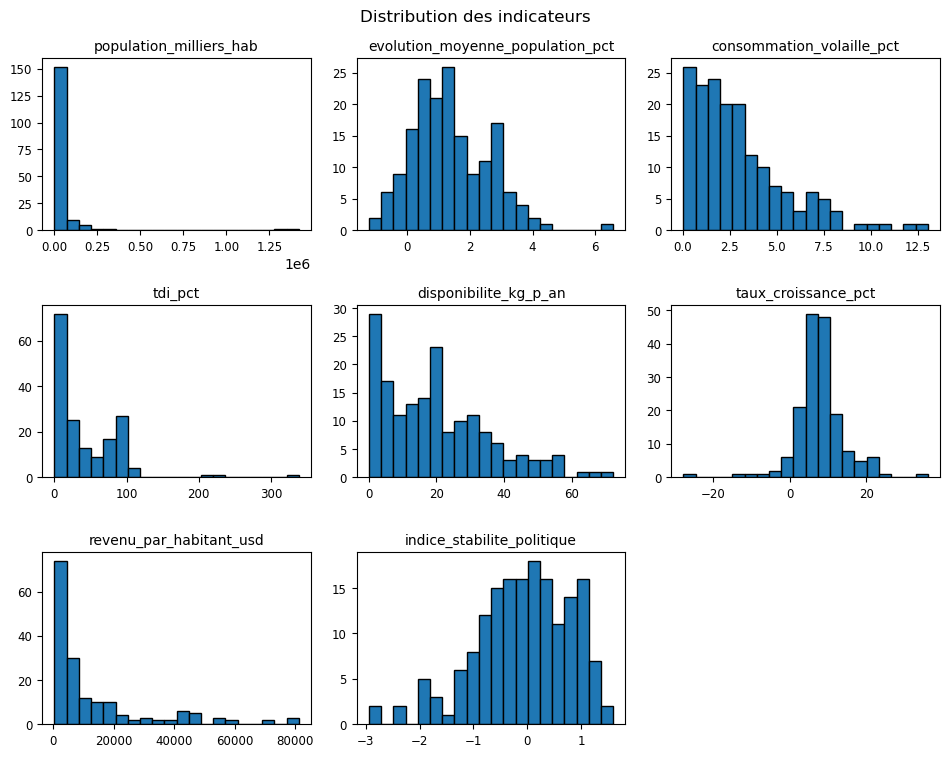

In [55]:
# Trace la distribution des indicateurs pour chaque variable

fig, axs = plt.subplots(3, 3, figsize=(9.6, 7.68))

for i, indicateur in enumerate(indicateurs):
    r = i // 3
    c = i % 3
    axs[r, c].hist(indicateur, data=df_final, edgecolor='k', bins=20)
    axs[r, c].set_title(indicateur, size=10)
    axs[r, c].tick_params(axis='both', which='both', labelsize=8.5)

# Supprime les graphiques vides
[fig.delaxes(ax) for ax in axs.flatten() if not ax.has_data()]

fig.suptitle('Distribution des indicateurs')

plt.tight_layout()

plt.show()

del fig, axs, i, r, c

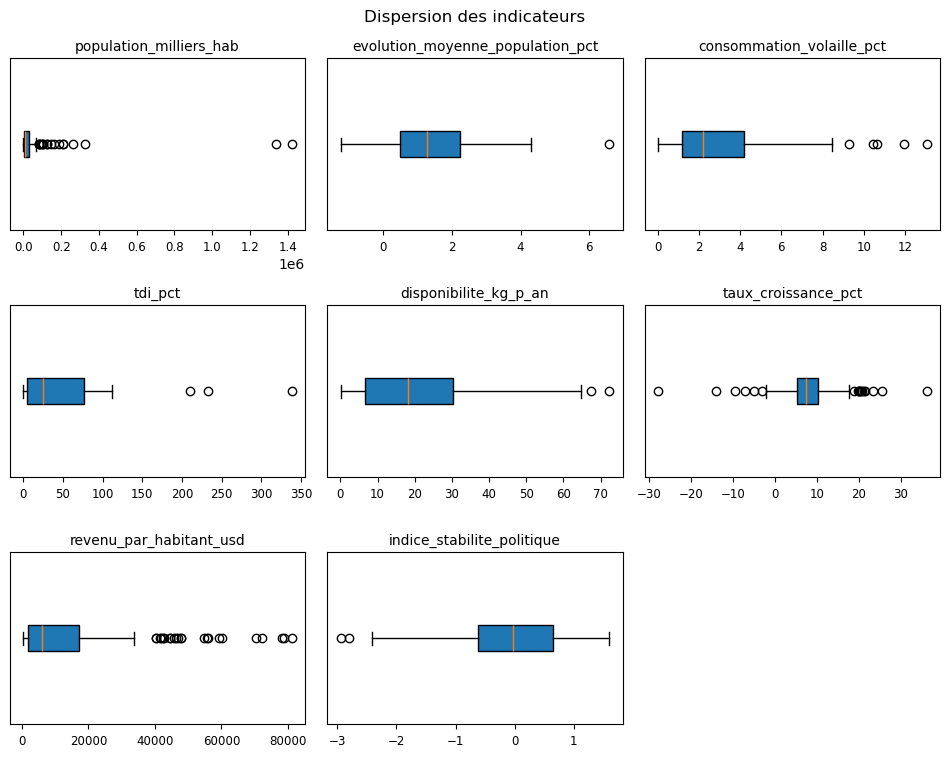

In [56]:
# Trace la dispersion des indicateurs pour chaque variable

fig, axs = plt.subplots(3, 3, figsize=(9.6, 7.68))

for i, indicateur in enumerate(indicateurs):
    r = i // 3
    c = i % 3
    axs[r, c].boxplot(indicateur, data=df_final, patch_artist=True, vert=False)
    axs[r, c].set_title(indicateur, size=10)
    axs[r, c].yaxis.set_major_locator(plt.NullLocator())
    axs[r, c].tick_params(axis='x', which='both', labelsize=8.5)

# Supprime les graphiques vides
[fig.delaxes(ax) for ax in axs.flatten() if not ax.has_data()]

fig.suptitle('Dispersion des indicateurs')

plt.tight_layout()

plt.show()

del fig, axs, i, indicateur, r, c

*Le tableau et les deux graphiques ci-dessus nous indique que nos données ne sont globalement pas centrées mais plutôt étirées dans un sens ou dans l'autre. La valeur de la population est même très concentrée. De plus, la plupart de nos indicateurs ont quelques valeurs aberrantes. Cela peut compliquer le clustering à venir et il pourrait être utile de traiter ces outliers. Nous allons les afficher un par un en créant une fonction dédiée.*

In [57]:
def display_outliers_tab(indicateur, position=['upper', 'lower']):
    """
    Affiche les pays outliers pour un indicateur donné de df_final.
    Paramètres :
    - indicateur : le nom de l'indicateur à afficher.
    - position : la position des outlier à afficher.
    """

    # Calcul les bornes max/min
    Q1 = df_final[indicateur].quantile(0.25)
    Q3 = df_final[indicateur].quantile(0.75)
    IQR = Q3 - Q1
    max_boxplot = 1.5 * IQR + Q3
    min_boxplot = Q1 - 1.5 * IQR

    # Filtre les outliers
    if position == 'upper':
        return df_final.loc[
            df_final[indicateur] >= max_boxplot, ['pays', indicateur]
        ].sort_values(by=indicateur, ascending=False)
    elif position == 'lower':
        return df_final.loc[
            df_final[indicateur] <= min_boxplot, ['pays', indicateur]
        ].sort_values(by=indicateur)

**On peut ensuite afficher les valeurs aberrantes de chaque indicateur.**

In [58]:
display_outliers_tab('population_milliers_hab', 'upper')

,pays,population_milliers_hab
33,"Chine, continentale",1421021.791
72,Inde,1338676.785
52,États-Unis d'Amérique,325084.756
73,Indonésie,264650.963
119,Pakistan,207906.209
23,Brésil,207833.823
113,Nigéria,190873.244
14,Bangladesh,159685.424
54,Fédération de Russie,145530.082
81,Japon,127502.725


In [59]:
display_outliers_tab('evolution_moyenne_population_pct', 'upper')

,pays,evolution_moyenne_population_pct
47,Émirats arabes unis,6.58


In [60]:
display_outliers_tab('consommation_volaille_pct', 'upper')

,pays,consommation_volaille_pct
138,Saint-Kitts-et-Nevis,13.04
139,Saint-Vincent-et-les Grenadines,11.94
158,Trinité-et-Tobago,10.65
137,Sainte-Lucie,10.42
63,Grenade,9.26


In [61]:
display_outliers_tab('tdi_pct', 'upper')

,pays,tdi_pct
31,Chine - RAS de Hong-Kong,338.43
17,Belgique,233.10
122,Pays-Bas,209.66


In [62]:
display_outliers_tab('disponibilite_kg_p_an', 'upper')

,pays,disponibilite_kg_p_an
139,Saint-Vincent-et-les Grenadines,72.31
78,Israël,67.39


In [63]:
display_outliers_tab('taux_croissance_pct', 'upper')

,pays,taux_croissance_pct
147,Soudan,36.133401
97,Malawi,25.544369
54,Fédération de Russie,23.293874
83,Kazakhstan,21.509200
110,Népal,21.222377
5,Angola,20.766646
168,Zambie,20.582767
109,Namibie,20.196593
162,Ukraine,20.067977
65,Guinée,20.000795


In [64]:
display_outliers_tab('taux_croissance_pct', 'lower')

,pays,taux_croissance_pct
45,Égypte,-27.795932
165,Venezuela (République bolivarienne du),-14.069328
44,Dominique,-9.636719
113,Nigéria,-7.143094
159,Tunisie,-4.951605
144,Sierra Leone,-3.201634


In [65]:
display_outliers_tab('revenu_par_habitant_usd', 'upper')

,pays,revenu_par_habitant_usd
150,Suisse,81118.449929
93,Luxembourg,78873.811051
114,Norvège,78263.704694
77,Islande,72312.699769
32,Chine - RAS de Macao,70300.937274
52,États-Unis d'Amérique,60297.391594
42,Danemark,59155.352625
76,Irlande,56058.607923
10,Australie,55633.452624
149,Suède,54722.389209


In [66]:
display_outliers_tab('indice_stabilite_politique', 'lower')

,pays,indice_stabilite_politique
167,Yémen,-2.94
0,Afghanistan,-2.80


Tous les outliers ne semblent pas être des erreurs. Nous faisons donc le choix de les conserver afin de ne pas perdre d'informations et fausser les résultats des groupements.

### Analyse Bivariée

**On commence par calculer les corrélations entres nos variables.**

In [67]:
correlation_matrix = df_final.corr(numeric_only=True)
correlation_matrix.style.format('{:.2f}')

,population_milliers_hab,evolution_moyenne_population_pct,consommation_volaille_pct,tdi_pct,disponibilite_kg_p_an,taux_croissance_pct,revenu_par_habitant_usd,indice_stabilite_politique
population_milliers_hab,1.00,-0.03,-0.11,-0.19,-0.09,0.05,-0.04,-0.15
evolution_moyenne_population_pct,-0.03,1.00,-0.13,0.02,-0.27,-0.07,-0.19,-0.36
consommation_volaille_pct,-0.11,-0.13,1.00,0.18,0.93,-0.14,0.23,0.34
tdi_pct,-0.19,0.02,0.18,1.00,0.17,-0.04,0.22,0.32
disponibilite_kg_p_an,-0.09,-0.27,0.93,0.17,1.00,-0.10,0.39,0.44
taux_croissance_pct,0.05,-0.07,-0.14,-0.04,-0.10,1.00,-0.04,0.00
revenu_par_habitant_usd,-0.04,-0.19,0.23,0.22,0.39,-0.04,1.00,0.56
indice_stabilite_politique,-0.15,-0.36,0.34,0.32,0.44,0.00,0.56,1.00


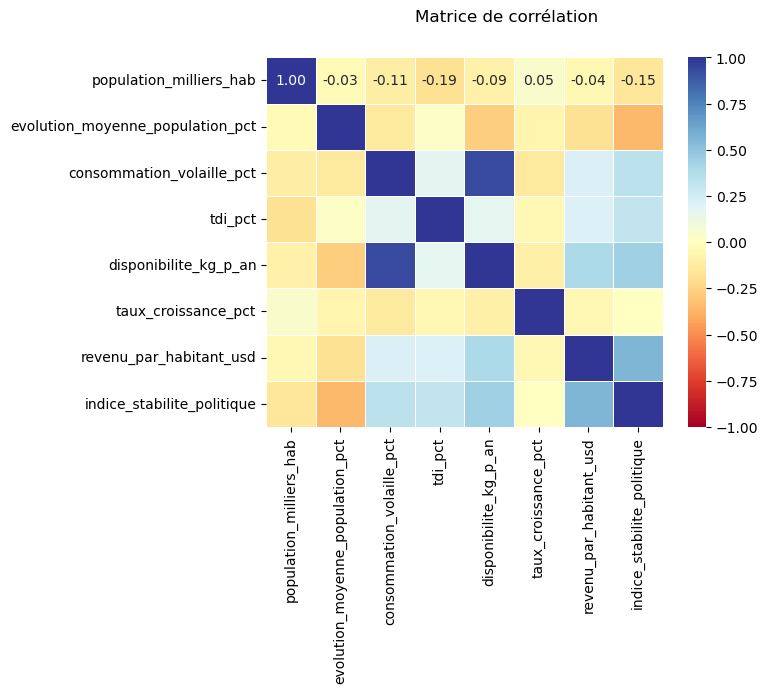

In [68]:
# Sélectionne uniquement les colonnes numériques
numeric_df = df_final.select_dtypes(include=[np.number])

# Calcul de la matrice de corrélation
correlation_matrix = numeric_df.corr()

# Affichage de la matrice de corrélation formatée
correlation_matrix.style.format('{:.2f}')

# Création de la heatmap
fig, ax = plt.subplots(figsize=(6.4, 4.8))

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', vmin=-1, vmax=1,
            annot_kws=None, linewidths=0.6, cmap='RdYlBu', ax=ax)

fig.suptitle('Matrice de corrélation')

plt.show()

On constate que :

la consommation et la disponibilité de volaille sont très corrélées ;
l'indice de stablilité politique est l'indicateur le plus corrélé avec les autres.

Relations entre variables quantitatives

Traçons les relations entre les variables ayant les valeurs de corrélations les plus significatives. Afin d'automatiser la sélection des variables, nous créons une fonction qui permet de ne tracer que les paires de variables qui nous intéressent.

On commence par calculer les corrélations entres nos variables.

In [69]:
def filtered_pairplot(df, corr_value, n_cols=3, fig_width=25, fig_height=20):
    """
    Trace les paires de variables en les filtrant à partir des coefficients de
    corrélation calculés dans la matrice de corrélation.
    Paramètres :
    - df : DataFrame source.
    - corr_value : valeur de corrélation minimale pour tracer la paire.
    - n_cols : nombre de colonnes du graphique.
    """

    # Sélectionne uniquement les colonnes numériques
    numeric_df = df.select_dtypes(include='number')

    # Calcule la matrice de corrélation et pivote les colonnes
    df_temp = numeric_df.corr().unstack().reset_index()

    # Renomme les colonnes
    df_temp = df_temp.rename(
        columns={'level_0': 'var_0', 'level_1': 'var_1', 0: 'value'})
    
    # Sélectionne les lignes ayant une valeur absolue supérieure à 'corr_value'
    df_temp = df_temp.loc[(np.abs(df_temp['value']) >= corr_value)
                          & (np.abs(df_temp['value']) != 1)]
    
    # Supprime les doublons
    df_temp = df_temp.drop_duplicates(subset='value')

    # Détermine le nombre de lignes de graphiques à créer
    n_rows = np.ceil(len(df_temp) / n_cols).astype(int)

    # Trace les graphiques
    fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols,
                            figsize=((n_cols*3), (2*n_rows+2)))
    
    # Boucle sur les lignes du DataFrame
    for i, row in enumerate(df_temp.itertuples()):

        # Calcul la position du graphique
        r = i // n_cols
        c = i % n_cols

        axs[r, c].scatter(df[row.var_0], df[row.var_1], edgecolors='w',
                          alpha=0.8)
        axs[r, c].set_xlabel(row.var_0, size=9)
        axs[r, c].set_ylabel(row.var_1, size=9)
        axs[r, c].tick_params(axis='both', which='both', labelsize=8.5)
    
    # Supprime les graphiques vides
    [fig.delaxes(ax) for ax in axs.flatten() if not ax.has_data()]

    fig.suptitle(
        f'Paires de variables avec coefficient de corrélation ≤ -{corr_value}' 
        f' et ≥ +{corr_value}'
        , y=1.02)
      
    fig.tight_layout()

    plt.show() 

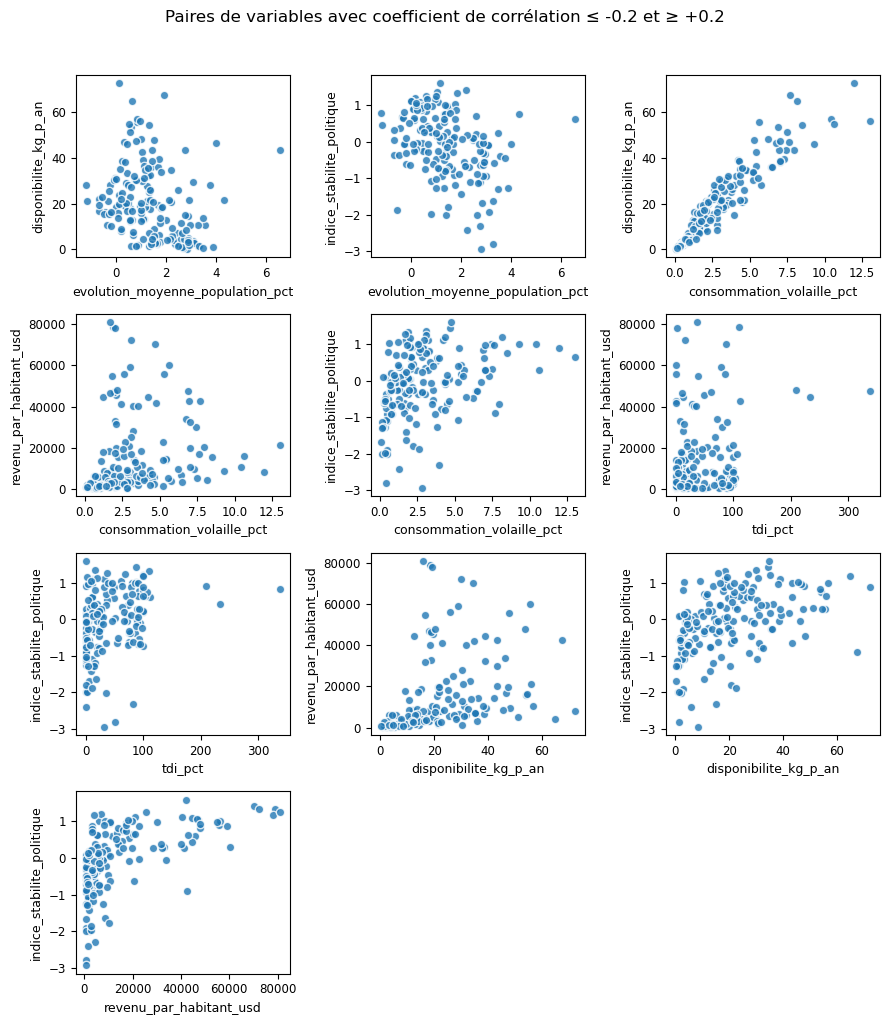

In [70]:
filtered_pairplot(df_final, 0.2)

*On constate que :*

*un lien entre la consommation et la disponibilité de volaille* 


**Exportation de df_final**

In [71]:
df_final.to_csv(r'C:\Users\orlya\Desktop\Projet 9\indicateur_pays_2017.csv', index=False)